# cancer diagnosis with logistic regression 

In [16]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x=np.asarray(df[['age','sex','cp','trtbps','chol','fbs','thalachh','exng','oldpeak','slp','slp','caa','thall']])
x[0:10]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. , 150. ,   0. ,   2.3,
          0. ,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. , 187. ,   0. ,   3.5,
          0. ,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. , 172. ,   0. ,   1.4,
          2. ,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. , 178. ,   0. ,   0.8,
          2. ,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. , 163. ,   1. ,   0.6,
          2. ,   2. ,   0. ,   2. ],
       [ 57. ,   1. ,   0. , 140. , 192. ,   0. , 148. ,   0. ,   0.4,
          1. ,   1. ,   0. ,   1. ],
       [ 56. ,   0. ,   1. , 140. , 294. ,   0. , 153. ,   0. ,   1.3,
          1. ,   1. ,   0. ,   2. ],
       [ 44. ,   1. ,   1. , 120. , 263. ,   0. , 173. ,   0. ,   0. ,
          2. ,   2. ,   0. ,   3. ],
       [ 52. ,   1. ,   2. , 172. , 199. ,   1. , 162. ,   0. ,   0.5,
          2. ,   2. ,   0. ,   3. ],
       [ 57. ,   1. ,   2. ,

In [19]:
y=np.asarray(df[['output']])

In [20]:
from sklearn import preprocessing
pre = preprocessing.StandardScaler()
X=pre.fit(x).transform(x)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39,  0.02, -0.7 ,  1.09,
        -2.27, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  1.63, -0.7 ,  2.12,
        -2.27, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42,  0.98, -0.7 ,  0.31,
         0.98,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  1.24, -0.7 , -0.21,
         0.98,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.58,  1.44, -0.38,
         0.98,  0.98, -0.71, -0.51]])

In [21]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_test[0:5]
y_test.shape



(61, 1)

attention ----> in this solution logistic regression has bean chosen because it works better with false negative in confusion matrix which is so important in  case of cancer diagnosis(in compare with svm aproach)  

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01,solver='saga').fit(X_train,y_train)
LR


C:\Users\sina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='saga')

In [23]:
Yp=LR.predict(X_test)
Yp

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
Yp_prob=LR.predict_proba(X_test)
Yp_prob

array([[0.35, 0.65],
       [0.7 , 0.3 ],
       [0.37, 0.63],
       [0.2 , 0.8 ],
       [0.41, 0.59],
       [0.44, 0.56],
       [0.66, 0.34],
       [0.22, 0.78],
       [0.46, 0.54],
       [0.33, 0.67],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.37, 0.63],
       [0.54, 0.46],
       [0.34, 0.66],
       [0.86, 0.14],
       [0.25, 0.75],
       [0.27, 0.73],
       [0.63, 0.37],
       [0.47, 0.53],
       [0.22, 0.78],
       [0.36, 0.64],
       [0.78, 0.22],
       [0.44, 0.56],
       [0.43, 0.57],
       [0.72, 0.28],
       [0.59, 0.41],
       [0.19, 0.81],
       [0.41, 0.59],
       [0.79, 0.21],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.15, 0.85],
       [0.34, 0.66],
       [0.41, 0.59],
       [0.23, 0.77],
       [0.21, 0.79],
       [0.38, 0.62],
       [0.46, 0.54],
       [0.78, 0.22],
       [0.77, 0.23],
       [0.67, 0.33],
       [0.7 , 0.3 ],
       [0.38, 0.62],
       [0.24, 0.76],
       [0.41, 0.59],
       [0.68, 0.32],
       [0.47,

In [25]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,Yp,pos_label=0)

0.7037037037037037

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, Yp, labels=[1,0]))

[[34  2]
 [ 6 19]]


Confusion matrix, without normalization
[[34  2]
 [ 6 19]]


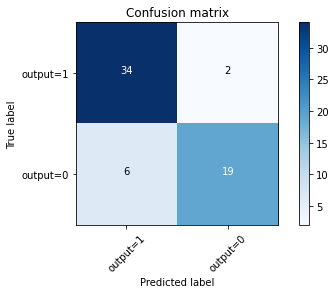

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Yp, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [28]:
print (classification_report(y_test, Yp))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



In [14]:
from sklearn.metrics import log_loss
log_loss(y_test, Yp_prob)

0.5062485713339391